In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
path = "./data/monthly_sales_2024/"
file_name = "sales2024_1.csv"
dataframe = pd.read_csv(path + file_name)
dataframe

,ResultID,Date,Product,Price,Quantity,Revenue,Customer,Customer Address
0,5,2024-01-04,Smartwatch,300.000000,20,6000.000000,David Miller,"123 Maple Street, Phoenix"
1,45,2024-01-10,Car Phone Mount,40.000000,15,600.000000,Elias Price,"123 Maple Street, Honolulu"
2,62,2024-01-27,Wireless Speaker,491.650595,6,2949.903570,Zoe Peterson,"1000 Pine Drive, Baton Rouge"
3,79,2024-01-15,USB-C Docking Station,252.410317,15,3786.154758,Benjamin Peterson,"123 Maple Street, Tucson"
4,87,2024-01-17,Portable Projector,1481.016272,15,22215.244081,Harper Lewis,NaN
5,115,2024-01-11,Portable Bluetooth Keyboard,1467.135497,10,14671.354972,Amelia Clark,NaN
6,136,2024-01-05,USB-C Docking Station,214.127967,15,3211.919510,Henry Scott,NaN
7,137,2024-01-17,Wireless Router,1184.952138,12,14219.425660,Zoe Young,NaN
8,138,2024-01-24,Compact Digital Camera,925.571177,15,13883.567656,Henry Scott,NaN


In [5]:
os.listdir(path)

['sales2024_1.csv',
 'sales2024_10.csv',
 'sales2024_11.csv',
 'sales2024_12.csv',
 'sales2024_2.csv',
 'sales2024_3.csv',
 'sales2024_4.csv',
 'sales2024_5.csv',
 'sales2024_6.csv',
 'sales2024_7.csv',
 'sales2024_8.csv',
 'sales2024_9.csv']

Merge 12-month data

In [6]:
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filefpath = path + file
        df1 = pd.read_csv(filefpath)
        frames.append(df1)
        result= pd.concat(frames)
result

,ResultID,Date,Product,Price,Quantity,Revenue,Customer,Customer Address
0,5,2024-01-04,Smartwatch,300.000000,20,6000.000000,David Miller,"123 Maple Street, Phoenix"
1,45,2024-01-10,Car Phone Mount,40.000000,15,600.000000,Elias Price,"123 Maple Street, Honolulu"
2,62,2024-01-27,Wireless Speaker,491.650595,6,2949.903570,Zoe Peterson,"1000 Pine Drive, Baton Rouge"
3,79,2024-01-15,USB-C Docking Station,252.410317,15,3786.154758,Benjamin Peterson,"123 Maple Street, Tucson"
4,87,2024-01-17,Portable Projector,1481.016272,15,22215.244081,Harper Lewis,NaN
...,...,...,...,...,...,...,...,...
9,106,2024-09-06,Gaming Keyboard,1146.121479,6,6876.728872,Logan Hall,NaN
10,132,2024-09-22,Compact Digital Camera,251.410546,15,3771.158189,Henry Scott,NaN
11,150,2024-09-09,Compact Digital Camera,790.104814,15,11851.572210,Henry Scott,NaN
12,154,2024-09-23,USB-C Docking Station,465.329821,15,6979.947317,Henry Scott,NaN


In [7]:
df = result
df.to_csv('annualSales2024.csv', index= False)

###Clean Data###

In [8]:
#Check for null values
null_product_df = df[df['Product'].isnull()]
null_address_df = df[df['Customer Address'].isnull()]
print(null_product_df + null_address_df)

    ResultID Date Product  Price  Quantity  Revenue Customer Customer Address
2        NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
3        NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
3        NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
4        NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
4        NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
..       ...  ...     ...    ...       ...      ...      ...              ...
15       NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
16       NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
17       NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
18       NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN
19       NaN  NaN     NaN    NaN       NaN      NaN      NaN              NaN

[80 rows x 8 columns]


In [9]:
# Remove rows containing blank data
df.dropna(inplace=True)

In [10]:
##Check for duplicate values
duplicate_rows = df[df.duplicated(subset=df.columns)]
duplicate_rows.head(10)

,ResultID,Date,Product,Price,Quantity,Revenue,Customer,Customer Address


In [11]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Add month column
df['Month'] = df['Date'].dt.month
df.head()

,ResultID,Date,Product,Price,Quantity,Revenue,Customer,Customer Address,Month
0,5,2024-01-04,Smartwatch,300.000000,20,6000.000000,David Miller,"123 Maple Street, Phoenix",1
1,45,2024-01-10,Car Phone Mount,40.000000,15,600.000000,Elias Price,"123 Maple Street, Honolulu",1
2,62,2024-01-27,Wireless Speaker,491.650595,6,2949.903570,Zoe Peterson,"1000 Pine Drive, Baton Rouge",1
3,79,2024-01-15,USB-C Docking Station,252.410317,15,3786.154758,Benjamin Peterson,"123 Maple Street, Tucson",1
0,2,2024-10-13,Smartphone,600.000000,8,4800.000000,Emily Johnson,"456 Elm Avenue, New York City",10


In [13]:
df

,ResultID,Date,Product,Price,Quantity,Revenue,Customer,Customer Address,Month
0,5,2024-01-04,Smartwatch,300.000000,20,6000.000000,David Miller,"123 Maple Street, Phoenix",1
1,45,2024-01-10,Car Phone Mount,40.000000,15,600.000000,Elias Price,"123 Maple Street, Honolulu",1
2,62,2024-01-27,Wireless Speaker,491.650595,6,2949.903570,Zoe Peterson,"1000 Pine Drive, Baton Rouge",1
3,79,2024-01-15,USB-C Docking Station,252.410317,15,3786.154758,Benjamin Peterson,"123 Maple Street, Tucson",1
0,2,2024-10-13,Smartphone,600.000000,8,4800.000000,Emily Johnson,"456 Elm Avenue, New York City",10
...,...,...,...,...,...,...,...,...,...
2,44,2024-09-22,Sleep Headphones,200.000000,12,2400.000000,Layla Brooks,"1000 Pine Drive, Minneapolis",9
3,49,2024-09-01,Bluetooth FM Transmitter,60.000000,6,360.000000,Leo Cox,"123 Main Street, Bakersfield",9
4,56,2024-09-19,Headphones,528.477470,10,5284.774701,Elijah Cooper,"456 Oak Avenue, Anchorage",9
5,70,2024-09-23,Portable Projector,1327.455889,15,19911.838330,Amelia Ward,"1000 Pine Drive, San Juan",9


In [14]:
print(set(df['Month']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [15]:
df = df[df['Month'] != ('Or')]
df = df[df['Month'] != ('nan')]
df

,ResultID,Date,Product,Price,Quantity,Revenue,Customer,Customer Address,Month
0,5,2024-01-04,Smartwatch,300.000000,20,6000.000000,David Miller,"123 Maple Street, Phoenix",1
1,45,2024-01-10,Car Phone Mount,40.000000,15,600.000000,Elias Price,"123 Maple Street, Honolulu",1
2,62,2024-01-27,Wireless Speaker,491.650595,6,2949.903570,Zoe Peterson,"1000 Pine Drive, Baton Rouge",1
3,79,2024-01-15,USB-C Docking Station,252.410317,15,3786.154758,Benjamin Peterson,"123 Maple Street, Tucson",1
0,2,2024-10-13,Smartphone,600.000000,8,4800.000000,Emily Johnson,"456 Elm Avenue, New York City",10
...,...,...,...,...,...,...,...,...,...
2,44,2024-09-22,Sleep Headphones,200.000000,12,2400.000000,Layla Brooks,"1000 Pine Drive, Minneapolis",9
3,49,2024-09-01,Bluetooth FM Transmitter,60.000000,6,360.000000,Leo Cox,"123 Main Street, Bakersfield",9
4,56,2024-09-19,Headphones,528.477470,10,5284.774701,Elijah Cooper,"456 Oak Avenue, Anchorage",9
5,70,2024-09-23,Portable Projector,1327.455889,15,19911.838330,Amelia Ward,"1000 Pine Drive, San Juan",9


1. Apply data science solutions to support decision_making.
- What was the best month for sales? How much was earned that month?

In [16]:
df['Sales'] = df['Sales'].astype(int)

KeyError: 'Sales'

In [ ]:
# Convert 'Order Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verify the conversion
print(df['Date'].dtype)
print(df['Date'].head())

In [ ]:
df.info()

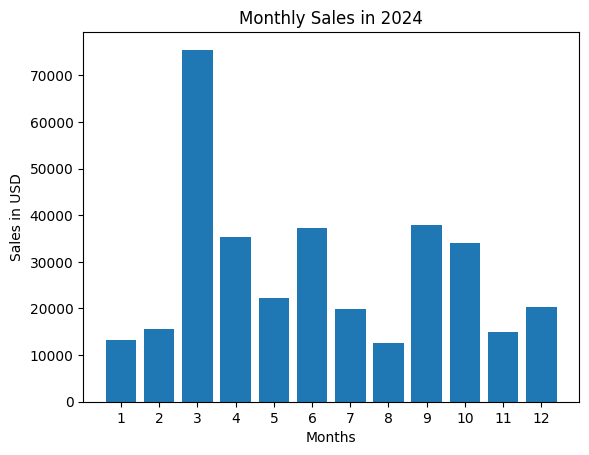

In [17]:
# Ensure 'Quantity' and 'Price' columns are numeric
result['Quantity'] = pd.to_numeric(result['Quantity'], downcast='integer')
result['Price'] = pd.to_numeric(result['Price'], downcast='float')

# Calculate the 'Sales' column
result['Sales'] = result['Quantity'] * result['Price']

# Move the 'Sales' column to the desired position
moving_column = result.pop('Sales')
result.insert(4, 'Sales', moving_column)

# Group by 'Month' and sum the 'Sales' column
sales_value = result.groupby('Month')['Sales'].sum()

# Plot the results
months = range(1, 13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.title('Monthly Sales in 2024')
plt.show()

- What city the best sales?

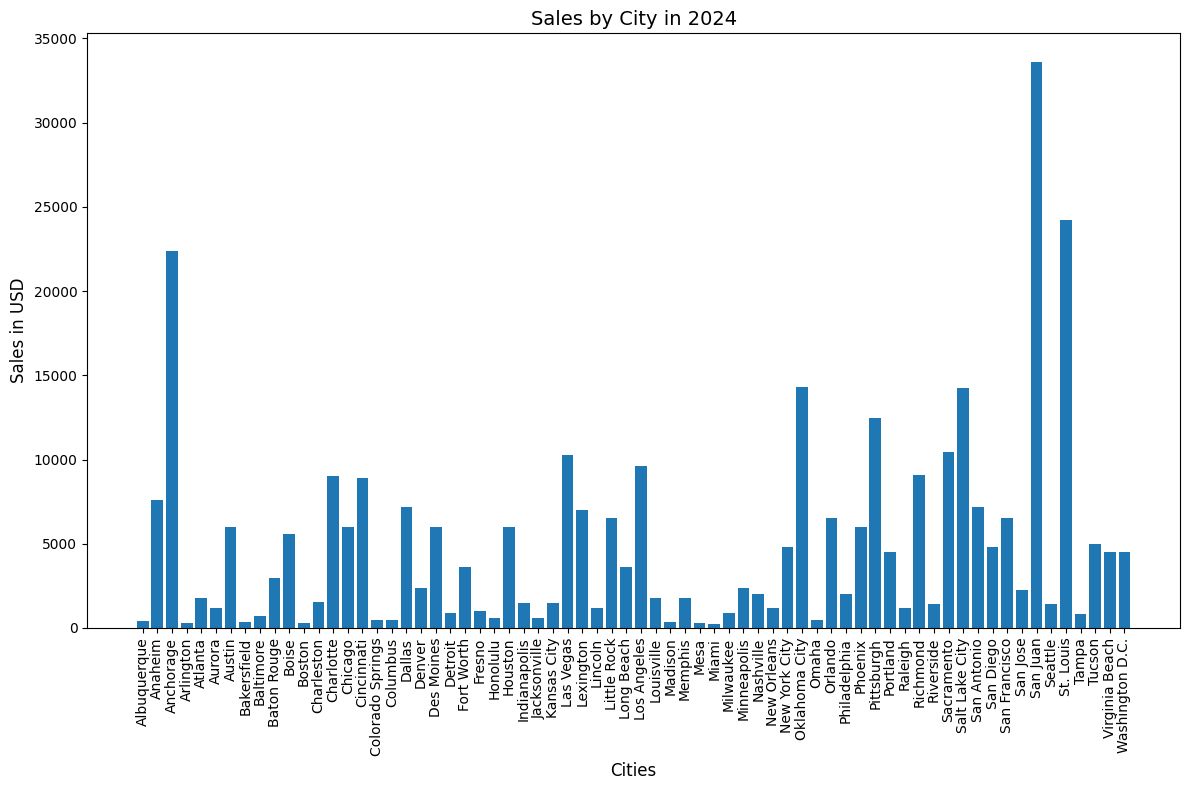

In [18]:
# Extract the city from the 'Customer Address' column
address_to_city = lambda address: address.split(',')[1].strip()
result['City'] = result['Customer Address'].apply(address_to_city)

# Group by 'City' and sum only numeric columns
sales_value_city = result.groupby('City').sum(numeric_only=True)['Sales']

# Get the list of cities and their corresponding sales values
cities = sales_value_city.index
sales_values = sales_value_city.values

# Plot the results with adjusted figure size and spacing
plt.figure(figsize=(12, 8))
plt.bar(x=cities, height=sales_values)
plt.xticks(cities, rotation=90, fontsize=10)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Sales in USD', fontsize=12)
plt.title('Sales by City in 2024', fontsize=14)
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

# Top N ProductID with the highest /lowest sales

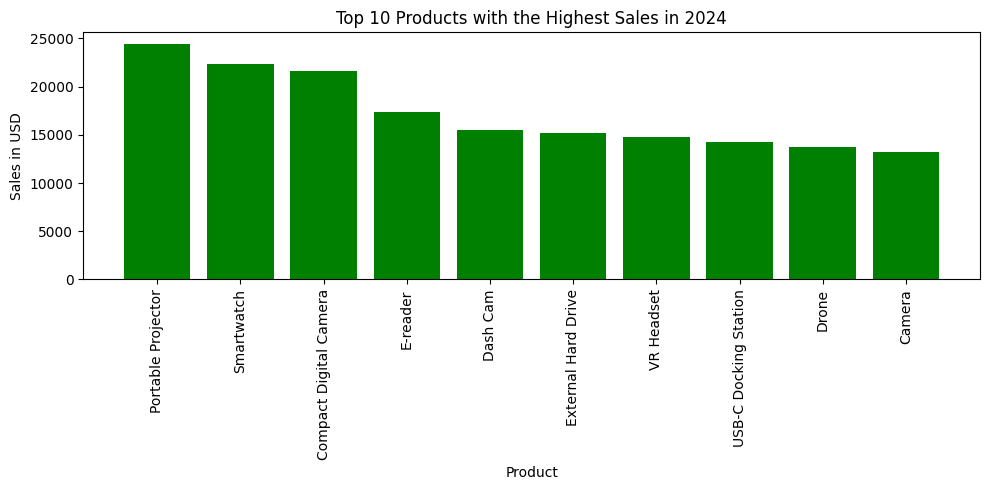

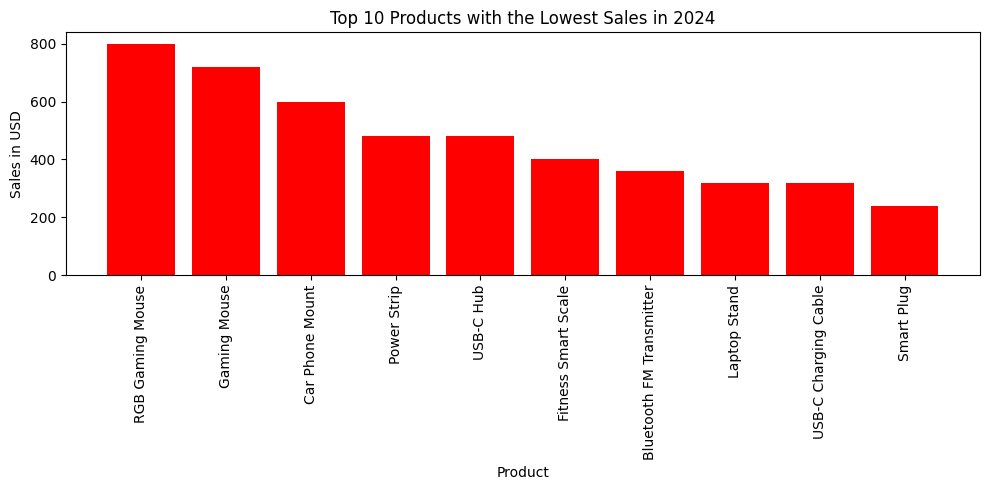

In [22]:
# Ensure 'Quantity' and 'Price' columns are numeric
result['Quantity'] = pd.to_numeric(result['Quantity'], downcast='integer')
result['Price'] = pd.to_numeric(result['Price'], downcast='float')

# Calculate the 'Sales' column
result['Sales'] = result['Quantity'] * result['Price']

# Group by 'ProductID' and sum the 'Sales' column
product_sales = result.groupby('Product').sum(numeric_only=True)['Sales']

# Sort the products by sales
sorted_product_sales = product_sales.sort_values(ascending=False)

# Define N for top/bottom N products
N = 10

# Select top N products with the highest sales
top_n_products = sorted_product_sales.head(N)

# Select top N products with the lowest sales
bottom_n_products = sorted_product_sales.tail(N)

# Plot the top N products with the highest sales
plt.figure(figsize=(10, 5))
plt.bar(top_n_products.index.astype(str), top_n_products.values, color='green')
plt.xlabel('Product')
plt.ylabel('Sales in USD')
plt.title(f'Top {N} Products with the Highest Sales in 2024')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top N City by Sales

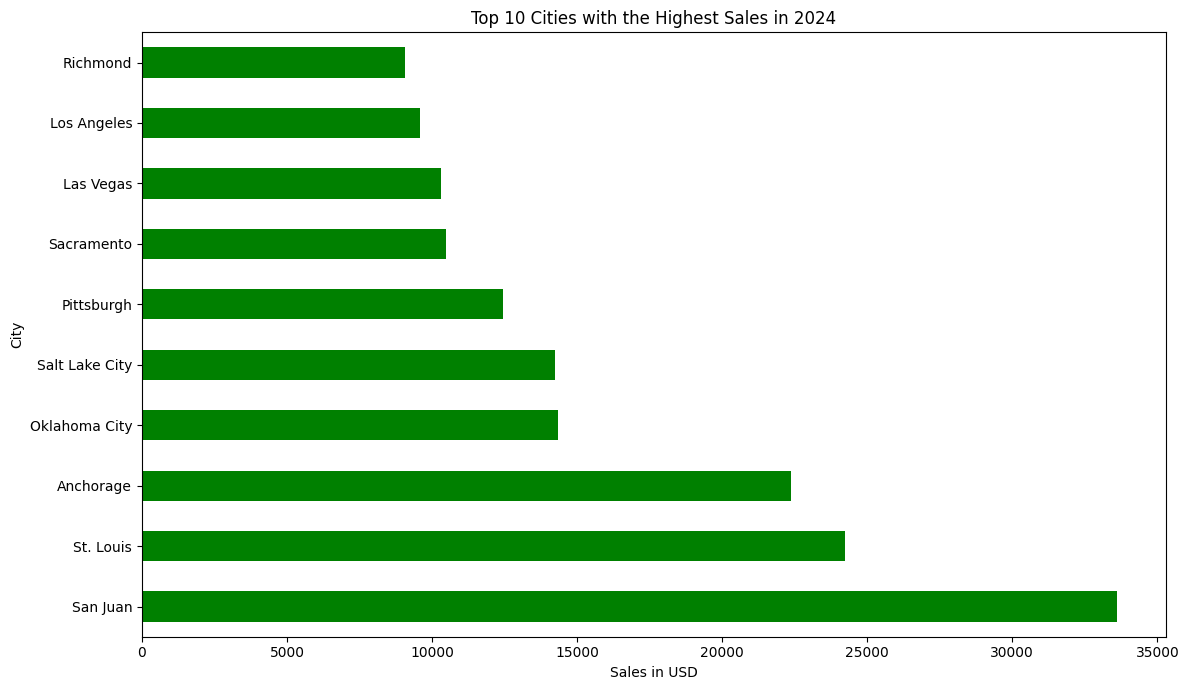

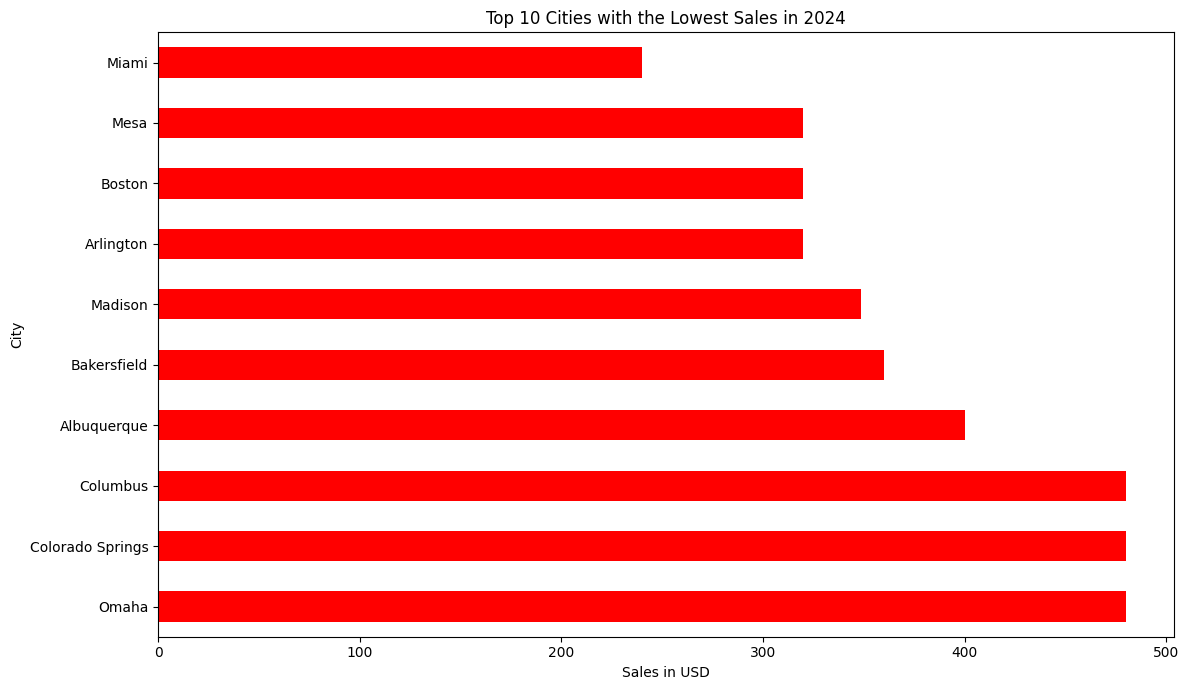

In [28]:
# Extract the city from the 'Customer Address' column
address_to_city = lambda address: address.split(',')[1].strip()
result['City'] = result['Customer Address'].apply(address_to_city)

# Ensure 'Quantity' and 'Price' columns are numeric
result['Quantity'] = pd.to_numeric(result['Quantity'], downcast='integer')
result['Price'] = pd.to_numeric(result['Price'], downcast='float')

# Calculate the 'Sales' column
result['Sales'] = result['Quantity'] * result['Price']

# Group by 'City' and sum the 'Sales' column
city_sales = result.groupby('City').sum(numeric_only=True)['Sales']

# Sort the cities by sales
sorted_city_sales = city_sales.sort_values(ascending=False)

# Define N for top/bottom N cities
N = 10

# Select top N cities with the highest sales
top_n_cities = sorted_city_sales.head(N)

# Select top N cities with the lowest sales
bottom_n_cities = sorted_city_sales.tail(N)

# Plot the top N cities with the highest sales using a horizontal bar chart
plt.figure(figsize=(12, 7))
top_n_cities.plot(kind='barh', color='green')
plt.xlabel('Sales in USD')
plt.ylabel('City')
plt.title(f'Top {N} Cities with the Highest Sales in 2024')
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

###Apply Linear Regression for predicting future sales

Mean Squared Error: 13399878.562326131


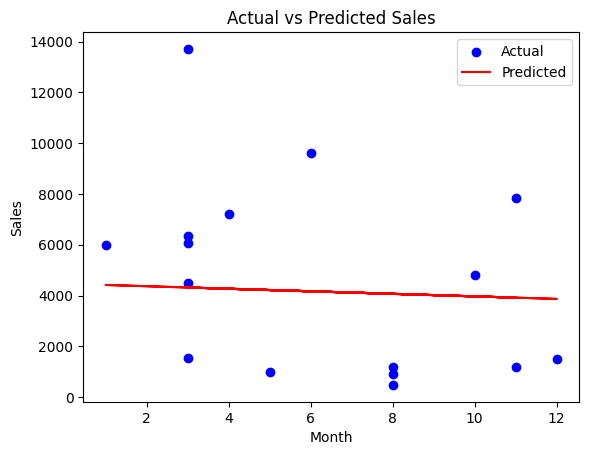

Predicted future sales: [3816.64633625 3766.68300953 3716.71968281]


In [25]:
# Preprocess the data
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Sales'] = df['Quantity'] * df['Price']

# Select features and target variable
X = df[['Month', 'Year']]  # Features: Month and Year
y = df['Sales']             # Target variable: Sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Visualize the actual vs predicted sales
plt.scatter(X_test['Month'], y_test, color='blue', label='Actual')
plt.plot(X_test['Month'], y_pred, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# Predict future sales
future_months = pd.DataFrame({'Month': [13, 14, 15], 'Year': [2024, 2024, 2024]})
future_sales = model.predict(future_months)
print('Predicted future sales:', future_sales)